## Análise de Regressão

O objetivo é prever o preço de imóveis de acordo com uma série de atributos da base histórica de venda de casas.
___

### Importações e inspeção dos dados

In [2]:
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

Importando os dados:

In [3]:
houses_data = pd.read_csv("house_prices.csv")
houses_data.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

Inspecionando os dados: 

In [4]:
houses_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
houses_data.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [6]:
houses_data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Inspecionando correlação entre os atributos:

<AxesSubplot:>

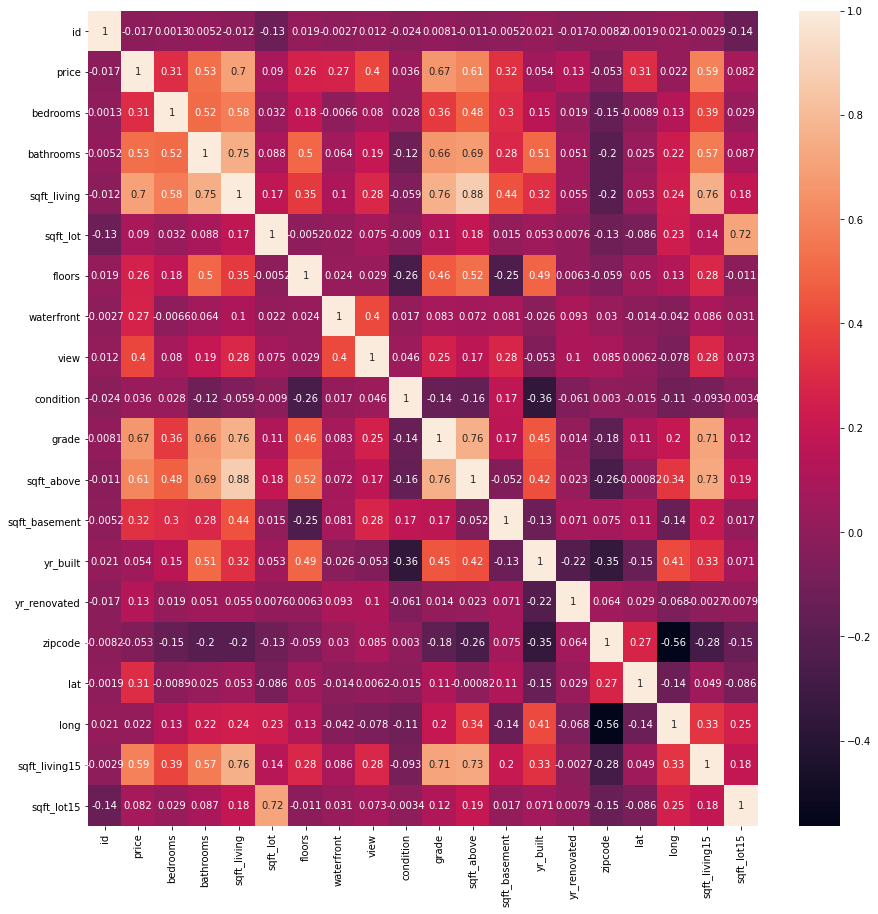

In [7]:
fig = plt.figure(figsize=(15,15))
sns.heatmap(houses_data.corr(), annot=True)

### Separando as variáveis preditoras da variável target (price):

In [8]:
# Variáveis X: formato de matriz
X_houses = houses_data.iloc[:, 3:19].values
X_houses.shape

(21613, 16)

In [9]:
# Variável y: array unidimensional
y_houses = houses_data.loc[:,"price"].values
y_houses.shape

(21613,)

### Separando as bases de treino e teste

Usaremos 30% da base para teste e 70% para treino:

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_houses, y_houses, test_size=0.3, random_state=0)

In [11]:
X_train.shape, y_train.shape, X_test.shape,y_test.shape

((15129, 16), (15129,), (6484, 16), (6484,))

----

## Construindo os modelos

### 1.Algoritmo Linear Regression

In [12]:
lm_houses = LinearRegression()
lm_houses.fit(X_train, y_train)

LinearRegression()

Inspecionando o valor dos parâmetros do modelo: intercepto e coeficiente de variação

In [13]:
print(lm_houses.intercept_)
print(lm_houses.coef_)

5736222.703398344
[-3.08423090e+04  3.66540816e+04  1.12179159e+02  8.00604119e-03
  9.60355724e+03  5.85441638e+05  5.60621840e+04  2.54795004e+04
  1.01092121e+05  6.96565320e+01  4.25226265e+01 -2.60724691e+03
  1.40070753e+01 -5.53557431e+02  6.11778251e+05 -1.95564688e+05]


Checando o ajuste do modelo (coeficiente de determinação) para a base de teste:

In [14]:
lm_houses.score(X_test, y_test)*100

68.85414149062721

Fazendo as previsões do preço das casas para as variáveis preditoras do conjunto de teste:


In [15]:
predict = lm_houses.predict(X_test)

Calculando as métricas de erro entre o observado e o predito para a base de teste:

In [16]:
mae = mean_absolute_error(y_test, predict)
mape = mean_absolute_percentage_error(y_test, predict)
rmse = mean_squared_error(y_test, predict, squared=False)

In [17]:
print(f'MAE: {round(mae,2)}')
print(f'MAPE: {round(mape*100,2)}%')
print(f'RMSE: {round(rmse,2)}')

MAE: 123888.44
MAPE: 24.9%
RMSE: 206786.74


---

### 2.Algoritmo Regressão Polinomial

Para fins de entendimento do modelo, irei usar o grau do polinômio = 2. Ou seja, para cada variável preditora X ele irá criar outra variável preditora com valor Xˆ2. Em uma análise mais completa, outros valores poderiam ser testados. Porém, nesse momento meu objetivo é apenas entender o funcionamento básico do algoritmo. Para esse objetivo um único valor será suficiente:

In [18]:
poly_features  = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [19]:
X_train_poly.shape, X_test_poly.shape

((15129, 153), (6484, 153))

Agora que jé temos um novo conjunto de preditores incluindo as variáveis polinomiais, vamos rodar o modelo de regressão linear novamente e checar se esse novo conjunto é capaz de explicar parte da variação da resposta (price):

In [20]:
lm_houses_poly = LinearRegression()
lm_houses_poly.fit(X_train_poly, y_train)

LinearRegression()

Checando o ajuste do modelo (coeficiente de determinação) para a base de teste:

In [21]:
lm_houses_poly.score(X_test_poly, y_test)

0.8153308776920744

Realizando as previsões para a base de preditores teste:

In [22]:
predict_poly = lm_houses_poly.predict(X_test_poly)

Calculando as métricas de erro entre o y observado (teste) e o y predito:

In [23]:
mae_poly = mean_absolute_error(y_test, predict_poly)
mape_poly = mean_absolute_percentage_error(y_test, predict_poly)
rmse_poly = mean_squared_error(y_test, predict_poly, squared=False)

In [24]:
print(f'MAE: {round(mae_poly,2)}')
print(f'MAPE: {round(mape_poly*100,2)}%')
print(f'RMSE: {round(rmse_poly,2)}')

MAE: 101227.25
MAPE: 20.63%
RMSE: 159228.09


---

### 3.Algoritmo Árvore de Decisão

In [25]:
tree_houses = DecisionTreeRegressor()
tree_houses.fit(X_train, y_train)

DecisionTreeRegressor()

Checando o ajuste do modelo (coeficiente de determinação) para a base de teste:

In [26]:
tree_houses.score(X_test, y_test)

0.7541682043395664

Realizando as previsões para a base de preditores teste:

In [27]:
predict_tree = tree_houses.predict(X_test)

Métricas de desempenho:

In [28]:
mae_tree = mean_absolute_error(y_test, predict_tree)
mape_tree = mean_absolute_percentage_error(y_test, predict_tree)
rmse_tree = mean_squared_error(y_test, predict_tree, squared=False)

In [29]:
print(f'MAE: {round(mae_tree,2)}')
print(f'MAPE: {round(mape_tree*100,2)}%')
print(f'RMSE: {round(rmse_tree,2)}')

MAE: 98805.32
MAPE: 18.24%
RMSE: 183713.71


---

### 4. Algoritmo Random Forest

In [30]:
random_forest_houses = RandomForestRegressor(n_estimators=100)
random_forest_houses.fit(X_train, y_train)

RandomForestRegressor()

Checando o ajuste do modelo para a base de teste:

In [31]:
random_forest_houses.score(X_test, y_test)

0.8806531183095903

Realizando as previsões para a base de preditores teste:

In [32]:
predict_random = random_forest_houses.predict(X_test)

Métricas de desempenho:

In [33]:
mae_random = mean_absolute_error(y_test, predict_random)
mape_random = mean_absolute_percentage_error(y_test, predict_random)
rmse_random = mean_squared_error(y_test, predict_random, squared=False)

In [34]:
print(f'MAE: {round(mae_random,2)}')
print(f'MAPE: {round(mape_random*100,2)}%')
print(f'RMSE: {round(rmse_random,2)}')

MAE: 67844.55
MAPE: 12.87%
RMSE: 128005.34


---

## Conclusão da análise

O melhor modelo para prever o preço das casas foi o Random Forest, com um erro percentual médio (MAPE) de 12%. Ou seja, em média, o modelo previu um preço com variação de 12% para mais ou para menos em relação ao preço real das casas, considerando a base de teste. Para refinar ainda mais os resultados da análise seria interessante realizar uma validação cruzada, realizando múltiplos treinos e testes. Dessa forma poderíamos reduzir algum potencial efeito da aleatoriedade na escolha única da base.